<a href="https://colab.research.google.com/github/nicolaciar/numerico1-famaf/blob/main/practicos/Practico3_ANI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 3 - Análisis Numérico I - FaMAF (2024)
>## Interpolación polinomial
 Método de Newton y de Lagrange, Error del polinomio interpolante, Splines.

### Ejercicio 1

a) Para la función $f(x)=\frac{1}{x}$, construir el polinomio interpolante de Lagrange $p$ y el polinomio interpolante de Newton $q$. Usar como nodos los puntos $x_0=2,\,x_1=2.5,\,x_2=4.$

* i) Comparar los polinomios $p$ y $q$ y dar sus grados.

* ii) Calcular $p(3)$.

* iii) Graficar $f(x)$ y $p(x)$.

* iv) Analizar los resultados.

b) Construir los polinomio de Taylor $p_n$ de grado $n=0,1,2,3$ de la función  $f(x)=\frac{1}{x}$ alrededor de $x_*=1$-

* i) Calcular $p_n(3)$.
* ii) Graficar $p_n(x)$

c) Comparar los valores $p(3)$ y $p_n(3)$.



---



**(a)** La **forma de Newton** del polinomio interpolante utilizando las *diferencias divididas* es

$$
q_k(x)=\sum_{i=0}^kf[x_0,x_1,…,x_j]\prod_{j=0}^{i-1}(x-x_j)
$$

Utilizamos el siguiente resultado para calcular las $f[x_0,x_1,…,x_n]$:

$$\tag{1}
f[x_0,x_1,…,x_n]=\frac{f[x_1,x_2,…,x_n]-f[x_0,x_1,…,x_{n-1}]}{x_n-x_0}
$$

Es decir, calculamos las sucesivas diferencias divididas hasta $x_n$. En nuestro caso debemos calcular las diferencias hasta el orden $f[x_0,x_1,x_2]$.

Las diferencias divididas de primer orden son:

\begin{align}
f[x_0]&=f(x_0)=f(2)=\frac{1}{2}\\
f[x_1]&=f(x_1)=f(2.5)=\frac{2}{5}\\
f[x_2]&=f(x_2)=f(4)=\frac{1}{4}
\end{align}

Con esto y según $(1)$, las diferencias divididas de segundo orden son:

\begin{align}
f[x_0,x_1]&=\frac{f[x_1]-f[x_0]}{x_1-x_0}=\frac{\frac{2}{5}-\frac{1}{2}}{2.5-2}=-\frac{1}{5}\\
f[x_1,x_2]&=\frac{f[x_2]-f[x_1]}{x_2-x_1}=\frac{\frac{1}{4}-\frac{2}{5}}{4-2.5}=-\frac{1}{10}
\end{align}

y finalmente:

\begin{align}
f[x_0,x_1,x_2]&=\frac{f[x_1,x_2]-f[x_0,x_1]}{x_2-x_0}=\frac{-\frac{1}{10}+\frac{1}{5}}{4-2}=\frac{1}{20}
\end{align}

Con estos calculos, el polinomio interpolante de Newton queda determinado:

\begin{align}
q(x)&=f[x_0]+f[x_0,x_1](x-x_0)+f[x_0,x_1,x_2](x-x_1)(x-x_0)\\
&=\frac{1}{2}-\frac{1}{5}⋅(x-2)+\frac{1}{20}\left(x-\frac{5}{2}\right)(x-2)
\end{align}

La **forma de Lagrange** del polinomio interpolante está dada por:

$$
p(x)=\sum_{i=0}^ny_i\,l_i(x)
$$

donde

$$\tag{para $i=0,\dots,n$}
l_i(x)=\prod_{j=0\\j\neq i}^n\frac{(x-x_j)}{(x_i-x_j)}
$$

son los polinomio básicos de Lagrange asociados a los puntos distintos $x_0,x_1,…,x_n$. Calculamos estos:

\begin{align}
l_0(x)&=\prod_{j=0}^2\frac{(x-x_j)}{(x_0-x_j)}=\frac{(x-x_1)}{(x_0-x_1)}⋅\frac{(x-x_2)}{(x_0-x_2)}\\
&=\frac{(x-2.5)}{(2-2.5)}⋅\frac{(x-4)}{(2-4)}\\
&=\left(x-\frac{5}{2}\right)(x-4)\\
&=x^2-\frac{13}{2}x+10
\end{align}

\begin{align}
l_1(x)&=\prod_{j=0}^2\frac{(x-x_j)}{(x_1-x_j)}=\frac{(x-x_0)}{(x_1-x_0)}⋅\frac{(x-x_2)}{(x_1-x_2)}\\
&=\frac{(x-2)}{(2.5-2)}⋅\frac{(x-4)}{(2.5-4)}\\
&=-\frac{4}{3}(x-2)(x-4)\\
&=-\frac{4}{3}x^2+8x-\frac{32}{3}
\end{align}

\begin{align}
l_2(x)&=\prod_{j=0}^2\frac{(x-x_j)}{(x_2-x_j)}=\frac{(x-x_0)}{(x_2-x_0)}⋅\frac{(x-x_1)}{(x_2-x_1)}\\
&=\frac{(x-2)}{(4-2)}⋅\frac{(x-2.5)}{(4-2.5)}\\
&=\frac{1}{3}(x-2)\left(x+\frac{5}{2}\right)\\
&=\frac{1}{3}x^2-\frac{3}{2}x+\frac{5}{3}
\end{align}

De donde:

\begin{align}
p(x)&=\sum_{i=0}^ny_i\,l_i(x)\\
&=f(x_0)l_0(x)+f(x_1)l_1(x)+f(x_2)l_2(x)\\
&=\frac{1}{2}\left(x^2-\frac{13}{2}x+10\right)+\frac{2}{5}\left(-\frac{4}{3}x^2+8x-\frac{32}{3}\right)+\frac{1}{4}\left(\frac{1}{3}x^2-\frac{3}{2}x+\frac{5}{3}\right)\\
&=\frac{1}{2}x^2-\frac{13}{4}x+5-\frac{8}{15}x^2+\frac{16}{5}x-\frac{64}{15}+\frac{1}{12}x^2-\frac{3}{8}x+\frac{5}{12}\\
&=\frac{1}{20}x^2-\frac{17}{40}x+\frac{23}{20}
\end{align}

**i)** Si comparamos ambos polinomios vemos que:


\begin{align}
q(x)&= \frac{1}{2}-\frac{1}{5}⋅(x-2)+\frac{1}{20}\left(x-\frac{5}{2}\right)(x-2)\\
&=\frac{1}{2}-\frac{x}{5}+\frac{2}{5}+\frac{1}{20}\left(x^2-\frac{9}{2}x+5\right)\\
&=\frac{9}{10}-\frac{x}{5}+\frac{x^2}{20}-\frac{9}{40}x+\frac{1}{4}\\
&=\frac{1}{20}x^2-\frac{17}{40}x+\frac{23}{20}\\
&=p(x)
\end{align}

Ambos son el mismo polinomio en concordancia con el Teorema 1 de la clase 7. Su grado es $n=2$.

**ii)** Tenemos:

\begin{align}
p(3)&=\frac{1}{20}(3)^2-\frac{17}{40}(3)+\frac{23}{20}\\
&=\frac{9}{20}-\frac{51}{40}+\frac{23}{20}\\
&=\frac{13}{40}=0.325
\end{align}

**iii)** Tenemos:

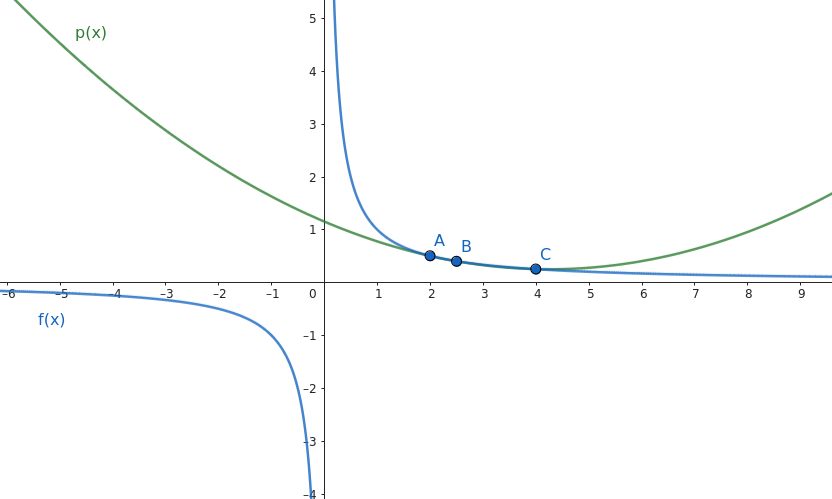



---



### Ejercicio 2

Demostrar que si $f$ es un polinomio de grado menor o igual que $n$ entonces el polinomio de grado menor o igual que $n$ que interpola a $f$ en $x_0,x_1,…,x_n$ es $f$.



---



Según el Teorema $1$ de la clase $7$, dados $x_0,x_1,\dots,x_n$ y sus respectivos valores $f(x_0),f(x_1),\dots,f(x_n)$ entonces el polinomio que interpola a $f$ en dichos puntos, de grado menor o igual que $n$, es **único**. Como $f$ es un polinomio de grado menor o igual que $n$ entonces $f$ es el polinomio que se interpola a si mismo.



---



### Ejercicio 3

Mostrar que si $g(x)$ interpola a $f(x)$ en los puntos $x_0,x_1,…,x_{n-1}$ y $h(x)$ interpola a $f(x)$ en los puntos $x_1,x_2,…,x_{n}$, entonces

$$
p(x)=g(x)+\frac{x_0-x}{x_n-x_0}(g(x)-h(x))
$$

interpola a $f(x)$ en $x_0,x_1,…,x_n.$



---



Si $g(x)$ interpola a $f$ en los puntos $x_0,x_1,\dots,x_{n-1}$, entonces

$$
g(x)=\sum_{i=0}^{n-1}f(x_i)l_i(x)
$$

Si $h(x)$ interpola a $f$ en los puntos $x_1,x_2,…,x_n$, entonces:

$$
h(x)=\sum_{i=1}^{n}f(x_i)l_i(x)
$$

Observemos que

\begin{align}
g(x)-h(x)&=\sum_{i=0}^{n-1}f(x_i)l_i(x)-\sum_{i=1}^nf(x_i)l_i(x)\\
&=f(x_0)l_0(x)-f(x_n)l_n(x)\\
&=f(x_0)\prod_{j=1}^n\frac{x-x_j}{x_0-x_j}-f(x_n)\prod_{j=0}^{n-1}\frac{x-x_j}{x_n-x_j}
\end{align}



